In [ ]:
#Aplicação que faz uma requisição para API covid-19 com os países Brasil e Alemanha, e gera o gráfico comparativo
#de novas mortes no ano de 2021 através da API quickchart.io

In [2]:
import requests as r

In [ ]:
#Requisição dos dados do Brasil

In [31]:
url = 'https://api.covid19api.com/dayone/country/brazil'
resp = r.get(url)

In [32]:
resp.status_code

200

In [33]:
raw_data = resp.json()

In [34]:
raw_data[0]

{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-02-26T00:00:00Z'}

In [ ]:
#Requisição dos dados da Alemanha

In [35]:
url = 'https://api.covid19api.com/dayone/country/germany'
resp = r.get(url)
resp.status_code

200

In [36]:
raw_data_de = resp.json()
raw_data_de[0]

{'ID': '4ddac43d-e691-4bab-8189-2725cf5d3935',
 'Country': 'Germany',
 'CountryCode': 'DE',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '51.17',
 'Lon': '10.45',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-01-27T00:00:00Z'}

In [ ]:
#Trata os dados e gera uma lista de lista calculando os novos casos e novas mortes diárias.

In [68]:
final_data = []
for i in range(0, len(raw_data)):
    #Calcular Novos Confirmados, Novas Mortes e Média Móvel
    if i > 6:
        novos = {
            'NConfirmed': raw_data[i]['Confirmed']-raw_data[i-1]['Confirmed'],
            'MMConfirmed': (raw_data[i]['Confirmed']-raw_data[i-7]['Confirmed'])//7,
            'NDeaths': raw_data[i]['Deaths']-raw_data[i-1]['Deaths'],
            'MMDeaths': (raw_data[i]['Deaths']-raw_data[i-7]['Deaths'])//7
        }
    elif i > 0:
        novos = {
            'NConfirmed': raw_data[i]['Confirmed']-raw_data[i-1]['Confirmed'],
            'MMConfirmed': (raw_data[i]['Confirmed']-raw_data[0]['Confirmed'])//7,
            'NDeaths': raw_data[i]['Deaths']-raw_data[i-1]['Deaths'],
            'MMDeaths': (raw_data[i]['Deaths']-raw_data[0]['Deaths'])//7
        }
    else:
        novos = {
            'NConfirmed': raw_data[i]['Confirmed'],
            'MMConfirmed': raw_data[i]['Confirmed']//7,
            'NDeaths': raw_data[i]['Deaths'],
            'MMDeaths': raw_data[i]['Deaths']//7
        }
    
    final_data.append([raw_data[i]['CountryCode'], raw_data[i]['Confirmed'], novos['NConfirmed'], novos['MMConfirmed'], raw_data[i]['Deaths'], novos['NDeaths'], novos['MMDeaths'], raw_data[i]['Recovered'], raw_data[i]['Active'], raw_data[i]['Date']])
    
    
final_data_de = []
novos = {}
for i in range(0, len(raw_data_de)):
    #Calcular Novos Confirmados, Novas Mortes e Média Móvel
    if i > 6:
        novos = {
            'NConfirmed': raw_data_de[i]['Confirmed']-raw_data_de[i-1]['Confirmed'],
            'MMConfirmed': (raw_data_de[i]['Confirmed']-raw_data_de[i-7]['Confirmed'])//7,
            'NDeaths': raw_data_de[i]['Deaths']-raw_data_de[i-1]['Deaths'],
            'MMDeaths': (raw_data_de[i]['Deaths']-raw_data_de[i-7]['Deaths'])//7
        }
    elif i > 0:
        novos = {
            'NConfirmed': raw_data_de[i]['Confirmed']-raw_data_de[i-1]['Confirmed'],
            'MMConfirmed': (raw_data_de[i]['Confirmed']-raw_data_de[0]['Confirmed'])//7,
            'NDeaths': raw_data_de[i]['Deaths']-raw_data_de[i-1]['Deaths'],
            'MMDeaths': (raw_data_de[i]['Deaths']-raw_data_de[0]['Deaths'])//7
        }
    else:
        novos = {
            'NConfirmed': raw_data_de[i]['Confirmed'],
            'MMConfirmed': raw_data_de[i]['Confirmed']//7,
            'NDeaths': raw_data_de[i]['Deaths'],
            'MMDeaths': raw_data_de[i]['Deaths']//7
        }
    
    final_data_de.append([raw_data_de[i]['CountryCode'], raw_data_de[i]['Confirmed'], novos['NConfirmed'], novos['MMConfirmed'], raw_data_de[i]['Deaths'], novos['NDeaths'], novos['MMDeaths'], raw_data_de[i]['Recovered'], raw_data_de[i]['Active'], raw_data_de[i]['Date']])

In [ ]:
#Insere os cabeçalhos

In [69]:
final_data.insert(0,['Pais', 'Confirmados', 'NConfirmados', 'MMConfirmados', 'Obitos', 'NObitos', 'MMObitos', 'Recuperados', 'Ativos', 'Data'])
final_data_de.insert(0,['Pais', 'Confirmados', 'NConfirmados', 'MMConfirmados', 'Obitos', 'NObitos', 'MMObitos', 'Recuperados', 'Ativos', 'Data'])
final_data

[['Pais',
  'Confirmados',
  'NConfirmados',
  'MMConfirmados',
  'Obitos',
  'NObitos',
  'MMObitos',
  'Recuperados',
  'Ativos',
  'Data'],
 ['BR', 1, 1, 0, 0, 0, 0, 0, 1, '2020-02-26T00:00:00Z'],
 ['BR', 1, 0, 0, 0, 0, 0, 0, 1, '2020-02-27T00:00:00Z'],
 ['BR', 1, 0, 0, 0, 0, 0, 0, 1, '2020-02-28T00:00:00Z'],
 ['BR', 2, 1, 0, 0, 0, 0, 0, 2, '2020-02-29T00:00:00Z'],
 ['BR', 2, 0, 0, 0, 0, 0, 0, 2, '2020-03-01T00:00:00Z'],
 ['BR', 2, 0, 0, 0, 0, 0, 0, 2, '2020-03-02T00:00:00Z'],
 ['BR', 2, 0, 0, 0, 0, 0, 0, 2, '2020-03-03T00:00:00Z'],
 ['BR', 4, 2, 0, 0, 0, 0, 0, 4, '2020-03-04T00:00:00Z'],
 ['BR', 4, 0, 0, 0, 0, 0, 0, 4, '2020-03-05T00:00:00Z'],
 ['BR', 13, 9, 1, 0, 0, 0, 0, 13, '2020-03-06T00:00:00Z'],
 ['BR', 13, 0, 1, 0, 0, 0, 0, 13, '2020-03-07T00:00:00Z'],
 ['BR', 20, 7, 2, 0, 0, 0, 0, 20, '2020-03-08T00:00:00Z'],
 ['BR', 25, 5, 3, 0, 0, 0, 0, 25, '2020-03-09T00:00:00Z'],
 ['BR', 31, 6, 4, 0, 0, 0, 0, 31, '2020-03-10T00:00:00Z'],
 ['BR', 38, 7, 4, 0, 0, 0, 0, 38, '2020-03-11T00:

In [70]:
final_data_de

[['Pais',
  'Confirmados',
  'NConfirmados',
  'MMConfirmados',
  'Obitos',
  'NObitos',
  'MMObitos',
  'Recuperados',
  'Ativos',
  'Data'],
 ['DE', 1, 1, 0, 0, 0, 0, 0, 1, '2020-01-27T00:00:00Z'],
 ['DE', 4, 3, 0, 0, 0, 0, 0, 4, '2020-01-28T00:00:00Z'],
 ['DE', 4, 0, 0, 0, 0, 0, 0, 4, '2020-01-29T00:00:00Z'],
 ['DE', 4, 0, 0, 0, 0, 0, 0, 4, '2020-01-30T00:00:00Z'],
 ['DE', 5, 1, 0, 0, 0, 0, 0, 5, '2020-01-31T00:00:00Z'],
 ['DE', 8, 3, 1, 0, 0, 0, 0, 8, '2020-02-01T00:00:00Z'],
 ['DE', 10, 2, 1, 0, 0, 0, 0, 10, '2020-02-02T00:00:00Z'],
 ['DE', 12, 2, 1, 0, 0, 0, 0, 12, '2020-02-03T00:00:00Z'],
 ['DE', 12, 0, 1, 0, 0, 0, 0, 12, '2020-02-04T00:00:00Z'],
 ['DE', 12, 0, 1, 0, 0, 0, 0, 12, '2020-02-05T00:00:00Z'],
 ['DE', 12, 0, 1, 0, 0, 0, 0, 12, '2020-02-06T00:00:00Z'],
 ['DE', 13, 1, 1, 0, 0, 0, 0, 13, '2020-02-07T00:00:00Z'],
 ['DE', 13, 0, 0, 0, 0, 0, 0, 13, '2020-02-08T00:00:00Z'],
 ['DE', 14, 1, 0, 0, 0, 0, 0, 14, '2020-02-09T00:00:00Z'],
 ['DE', 14, 0, 0, 0, 0, 0, 0, 14, '2020-02-

In [ ]:
#Cria constantes para a posição de cada campo nas listas

In [47]:
PAIS = 0
CONFIRMADOS = 1
NCOFIRMADOS = 2
MMCONFIRMADOS = 3
OBITOS = 4
NOBITOS = 5
MMOBITOS = 6
RECUPERADOS = 7
ATIVOS = 8
DATA = 9

In [ ]:
#Remove o time e timezone

In [71]:
for i in range(1, len(final_data)):
    final_data[i][DATA] = final_data[i][DATA][:10]
    
for i in range(1, len(final_data_de)):
    final_data_de[i][DATA] = final_data_de[i][DATA][:10]

In [72]:
final_data

[['Pais',
  'Confirmados',
  'NConfirmados',
  'MMConfirmados',
  'Obitos',
  'NObitos',
  'MMObitos',
  'Recuperados',
  'Ativos',
  'Data'],
 ['BR', 1, 1, 0, 0, 0, 0, 0, 1, '2020-02-26'],
 ['BR', 1, 0, 0, 0, 0, 0, 0, 1, '2020-02-27'],
 ['BR', 1, 0, 0, 0, 0, 0, 0, 1, '2020-02-28'],
 ['BR', 2, 1, 0, 0, 0, 0, 0, 2, '2020-02-29'],
 ['BR', 2, 0, 0, 0, 0, 0, 0, 2, '2020-03-01'],
 ['BR', 2, 0, 0, 0, 0, 0, 0, 2, '2020-03-02'],
 ['BR', 2, 0, 0, 0, 0, 0, 0, 2, '2020-03-03'],
 ['BR', 4, 2, 0, 0, 0, 0, 0, 4, '2020-03-04'],
 ['BR', 4, 0, 0, 0, 0, 0, 0, 4, '2020-03-05'],
 ['BR', 13, 9, 1, 0, 0, 0, 0, 13, '2020-03-06'],
 ['BR', 13, 0, 1, 0, 0, 0, 0, 13, '2020-03-07'],
 ['BR', 20, 7, 2, 0, 0, 0, 0, 20, '2020-03-08'],
 ['BR', 25, 5, 3, 0, 0, 0, 0, 25, '2020-03-09'],
 ['BR', 31, 6, 4, 0, 0, 0, 0, 31, '2020-03-10'],
 ['BR', 38, 7, 4, 0, 0, 0, 0, 38, '2020-03-11'],
 ['BR', 52, 14, 6, 0, 0, 0, 0, 52, '2020-03-12'],
 ['BR', 151, 99, 19, 0, 0, 0, 0, 151, '2020-03-13'],
 ['BR', 151, 0, 19, 0, 0, 0, 0, 151, 

In [73]:
final_data_de

[['Pais',
  'Confirmados',
  'NConfirmados',
  'MMConfirmados',
  'Obitos',
  'NObitos',
  'MMObitos',
  'Recuperados',
  'Ativos',
  'Data'],
 ['DE', 1, 1, 0, 0, 0, 0, 0, 1, '2020-01-27'],
 ['DE', 4, 3, 0, 0, 0, 0, 0, 4, '2020-01-28'],
 ['DE', 4, 0, 0, 0, 0, 0, 0, 4, '2020-01-29'],
 ['DE', 4, 0, 0, 0, 0, 0, 0, 4, '2020-01-30'],
 ['DE', 5, 1, 0, 0, 0, 0, 0, 5, '2020-01-31'],
 ['DE', 8, 3, 1, 0, 0, 0, 0, 8, '2020-02-01'],
 ['DE', 10, 2, 1, 0, 0, 0, 0, 10, '2020-02-02'],
 ['DE', 12, 2, 1, 0, 0, 0, 0, 12, '2020-02-03'],
 ['DE', 12, 0, 1, 0, 0, 0, 0, 12, '2020-02-04'],
 ['DE', 12, 0, 1, 0, 0, 0, 0, 12, '2020-02-05'],
 ['DE', 12, 0, 1, 0, 0, 0, 0, 12, '2020-02-06'],
 ['DE', 13, 1, 1, 0, 0, 0, 0, 13, '2020-02-07'],
 ['DE', 13, 0, 0, 0, 0, 0, 0, 13, '2020-02-08'],
 ['DE', 14, 1, 0, 0, 0, 0, 0, 14, '2020-02-09'],
 ['DE', 14, 0, 0, 0, 0, 0, 0, 14, '2020-02-10'],
 ['DE', 16, 2, 0, 0, 0, 0, 0, 16, '2020-02-11'],
 ['DE', 16, 0, 0, 0, 0, 0, 0, 16, '2020-02-12'],
 ['DE', 16, 0, 0, 0, 0, 0, 1, 15, '2

In [51]:
import datetime as dt

In [ ]:
#Grava arquivo csv com dados tratados

In [52]:
import csv

In [74]:
with open('brasil-covid-2.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(final_data)
    
with open('alemanha-covid-2.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(final_data_de)

In [ ]:
#Transforma a data de string para tipo datetime

In [75]:
for i in range(1, len(final_data)):
    final_data[i][DATA] = dt.datetime.strptime(final_data[i][DATA], '%Y-%m-%d')
    
for i in range(1, len(final_data_de)):
    final_data_de[i][DATA] = dt.datetime.strptime(final_data_de[i][DATA], '%Y-%m-%d')

In [76]:
final_data

[['Pais',
  'Confirmados',
  'NConfirmados',
  'MMConfirmados',
  'Obitos',
  'NObitos',
  'MMObitos',
  'Recuperados',
  'Ativos',
  'Data'],
 ['BR', 1, 1, 0, 0, 0, 0, 0, 1, datetime.datetime(2020, 2, 26, 0, 0)],
 ['BR', 1, 0, 0, 0, 0, 0, 0, 1, datetime.datetime(2020, 2, 27, 0, 0)],
 ['BR', 1, 0, 0, 0, 0, 0, 0, 1, datetime.datetime(2020, 2, 28, 0, 0)],
 ['BR', 2, 1, 0, 0, 0, 0, 0, 2, datetime.datetime(2020, 2, 29, 0, 0)],
 ['BR', 2, 0, 0, 0, 0, 0, 0, 2, datetime.datetime(2020, 3, 1, 0, 0)],
 ['BR', 2, 0, 0, 0, 0, 0, 0, 2, datetime.datetime(2020, 3, 2, 0, 0)],
 ['BR', 2, 0, 0, 0, 0, 0, 0, 2, datetime.datetime(2020, 3, 3, 0, 0)],
 ['BR', 4, 2, 0, 0, 0, 0, 0, 4, datetime.datetime(2020, 3, 4, 0, 0)],
 ['BR', 4, 0, 0, 0, 0, 0, 0, 4, datetime.datetime(2020, 3, 5, 0, 0)],
 ['BR', 13, 9, 1, 0, 0, 0, 0, 13, datetime.datetime(2020, 3, 6, 0, 0)],
 ['BR', 13, 0, 1, 0, 0, 0, 0, 13, datetime.datetime(2020, 3, 7, 0, 0)],
 ['BR', 20, 7, 2, 0, 0, 0, 0, 20, datetime.datetime(2020, 3, 8, 0, 0)],
 ['BR',

In [77]:
final_data_de

[['Pais',
  'Confirmados',
  'NConfirmados',
  'MMConfirmados',
  'Obitos',
  'NObitos',
  'MMObitos',
  'Recuperados',
  'Ativos',
  'Data'],
 ['DE', 1, 1, 0, 0, 0, 0, 0, 1, datetime.datetime(2020, 1, 27, 0, 0)],
 ['DE', 4, 3, 0, 0, 0, 0, 0, 4, datetime.datetime(2020, 1, 28, 0, 0)],
 ['DE', 4, 0, 0, 0, 0, 0, 0, 4, datetime.datetime(2020, 1, 29, 0, 0)],
 ['DE', 4, 0, 0, 0, 0, 0, 0, 4, datetime.datetime(2020, 1, 30, 0, 0)],
 ['DE', 5, 1, 0, 0, 0, 0, 0, 5, datetime.datetime(2020, 1, 31, 0, 0)],
 ['DE', 8, 3, 1, 0, 0, 0, 0, 8, datetime.datetime(2020, 2, 1, 0, 0)],
 ['DE', 10, 2, 1, 0, 0, 0, 0, 10, datetime.datetime(2020, 2, 2, 0, 0)],
 ['DE', 12, 2, 1, 0, 0, 0, 0, 12, datetime.datetime(2020, 2, 3, 0, 0)],
 ['DE', 12, 0, 1, 0, 0, 0, 0, 12, datetime.datetime(2020, 2, 4, 0, 0)],
 ['DE', 12, 0, 1, 0, 0, 0, 0, 12, datetime.datetime(2020, 2, 5, 0, 0)],
 ['DE', 12, 0, 1, 0, 0, 0, 0, 12, datetime.datetime(2020, 2, 6, 0, 0)],
 ['DE', 13, 1, 1, 0, 0, 0, 0, 13, datetime.datetime(2020, 2, 7, 0, 0)],


In [57]:
#Função para gerar datasets
def get_datasets(y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data': y[i]
            })
        return datasets
    else:
        returns [
            {
                'label': labels[0],
                'data': y
            }
        ]

In [58]:
#Função para imprimir título
def set_title(title=''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return {
        'title': title,
        'display': display
    }

In [59]:
#Função para criar chart que será enviado na requisição da API quickchart.io
def create_chart(x, y, labels, kind='bar', title=''):
    
    datasets = get_datasets(y, labels)
    options = set_title(title)
    
    chart = {
        'type': kind,
        'data': {
            'labels': x,
            'datasets': datasets
        },
        'options': options
    }
    return chart

In [60]:
#Função para fazer requisição para API quickchart.io
def get_api_chart(chart):
    url_base = 'https://quickchart.io/chart'
    resp = r.get(f'{url_base}?c={str(chart)}')
    return resp.content

In [61]:
#Função para salvar conteúdo como imagem
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)

In [ ]:
#Função para exibir imagem no Jupyter

In [63]:
from PIL import Image
from IPython.display import display

In [64]:
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

In [ ]:
#Recupera obitos das duas séries de dados, cria o chart, faz a requisição, salva a imagem e exibe.

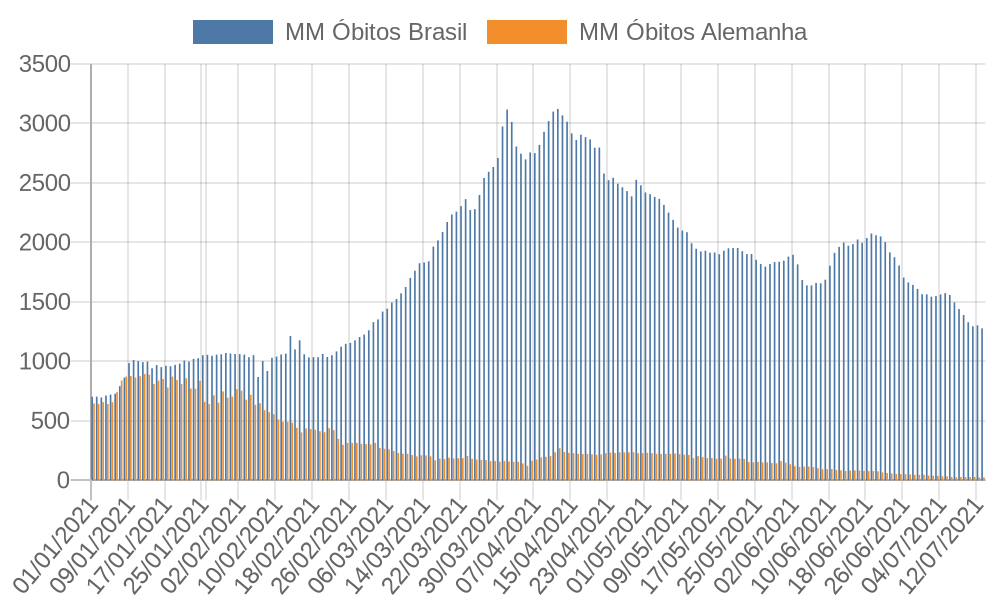

In [80]:
y_data_1 = []
for obs in final_data[311:505]:
    y_data_1.append(obs[MMOBITOS])
    
y_data_2 = []
for obs in final_data_de[342:536]:
    y_data_2.append(obs[MMOBITOS])
      
labels = ['MM Óbitos Brasil', 'MM Óbitos Alemanha']

#Datas para eixo X
x = []
for obs in final_data[311:505]:
    x.append(obs[DATA].strftime('%d/%m/%Y'))
    
chart = create_chart(x, [y_data_1, y_data_2], labels, kind='bar', title='Gráfico Média Móvel Obitos por Covid-19 em 2021')
chart_content = get_api_chart(chart)
save_image('grafico-novos.png', chart_content)
display_image('grafico-novos.png')

In [85]:
from urllib.parse import quote

In [93]:
def get_api_qrcode(link):
    text = quote(link) # parsing do link para url
    url_base = 'https://quickchart.io/qr'
    resp = r.get(f'{url_base}?text={text}')
    return resp.content

In [103]:
url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code2.png', get_api_qrcode(link))
display_image('qr-code2.png')

UnidentifiedImageError: cannot identify image file 'qr-code2.png'